In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

import matplotlib.pyplot as plt
import statsmodels
from scipy import stats

%matplotlib inline

In [2]:
flight_traffic = pd.read_csv('flight_traffic.csv')
flight_traffic.replace(np.nan,0, inplace=True)
flight_traffic[(flight_traffic['origin_airport'] == "BUF") & (flight_traffic['day'] == 1)].head(7)

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,...,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
2003,2017,1,1,B6,BUF,JFK,1635,1629.0,8.0,1637.0,...,0,0,89.0,73.0,301,0.0,0.0,0.0,0.0,0.0
6597,2017,1,1,OO,BUF,ORD,1656,1651.0,8.0,1659.0,...,0,0,123.0,102.0,474,0.0,0.0,0.0,0.0,0.0
57150,2017,2,1,DL,BUF,ATL,1107,1102.0,13.0,1115.0,...,0,0,144.0,123.0,712,0.0,0.0,0.0,0.0,0.0
57161,2017,2,1,DL,BUF,JFK,541,540.0,33.0,613.0,...,0,0,104.0,93.0,301,0.0,0.0,0.0,0.0,0.0
83041,2017,2,1,WN,BUF,BWI,1745,1739.0,16.0,1755.0,...,0,0,75.0,77.0,281,0.0,0.0,0.0,0.0,0.0
83042,2017,2,1,WN,BUF,FLL,1405,1403.0,8.0,1411.0,...,0,0,185.0,169.0,1166,0.0,0.0,0.0,0.0,0.0
86595,2017,3,1,AA,BUF,CLT,814,821.0,20.0,841.0,...,0,0,129.0,125.0,546,0.0,0.0,0.0,0.0,0.0


In [3]:
weather = pd.read_csv('weather.csv')
weather.replace(np.nan,0, inplace=True)
weather.head(5)


,airport_id,airport_name,latitude,longitude,elevation,datetime,temperature,visibility,wind_direction,wind_speed,snow_depth,cloud_status
0,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T00:54:00,3.9,16093,220,7.2,0.0,0.0
1,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T06:54:00,0.6,16093,260,6.2,0.0,0.0
2,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T12:54:00,-0.6,16093,250,5.1,0.0,9.0
3,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T18:54:00,2.2,16093,240,5.7,0.0,9.0
4,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-02T00:54:00,-0.6,16093,170,1.5,0.0,0.0


In [4]:
weather['datetime'] = pd.to_datetime(weather['datetime'])

weather['year'] = weather['datetime'].dt.year
weather['month'] = weather['datetime'].dt.month
weather['day'] = weather['datetime'].dt.day

In [5]:
# Merge delays and weather dataset
df = pd.merge(flight_traffic, weather,  left_on=['year', 'month', 'day', 'origin_airport'], 
              right_on=['year', 'month', 'day', 'airport_id'], copy=False)


In [6]:
# Select necessary varibales
df_sub = df[df['weather_delay'] != 0][['year', 'month', 'day', 'datetime', 'airline_id','airport_name', 'airport_id', 'weather_delay', 'visibility', 'wind_direction', 'wind_speed',
       'snow_depth', 'cloud_status']]
df_sub = df_sub[(df_sub['airport_id'] == 'JFK') | (df_sub['airport_id'] == 'EWR') | (df_sub['airport_id'] == 'LGA')]
df_sub.reset_index(inplace=True)


In [7]:

df_sub.rename(columns={'cloud_status': 'cloud', 'snow_depth': 'snow'}, inplace=True)
df_sub.head()

,index,year,month,day,datetime,airline_id,airport_name,airport_id,weather_delay,visibility,wind_direction,wind_speed,snow,cloud
0,34676,2017,1,22,2017-01-22 00:51:00,B6,"JFK INTERNATIONAL AIRPORT, NY US",JFK,51.0,805,240,4.6,0.0,9.0
1,34677,2017,1,22,2017-01-22 06:51:00,B6,"JFK INTERNATIONAL AIRPORT, NY US",JFK,51.0,201,210,2.1,0.0,9.0
2,34678,2017,1,22,2017-01-22 12:51:00,B6,"JFK INTERNATIONAL AIRPORT, NY US",JFK,51.0,3219,90,1.5,0.0,9.0
3,34679,2017,1,22,2017-01-22 18:51:00,B6,"JFK INTERNATIONAL AIRPORT, NY US",JFK,51.0,11265,10,4.6,0.0,9.0
4,36348,2017,1,3,2017-01-03 00:51:00,AA,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",EWR,1.0,4828,20,5.1,0.0,9.0


In [8]:
len(df_sub)

1364

1.000733137829912
       weather_delay
cloud       0.977273
snow        0.023460


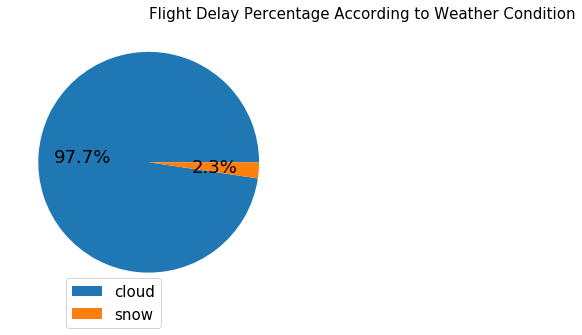

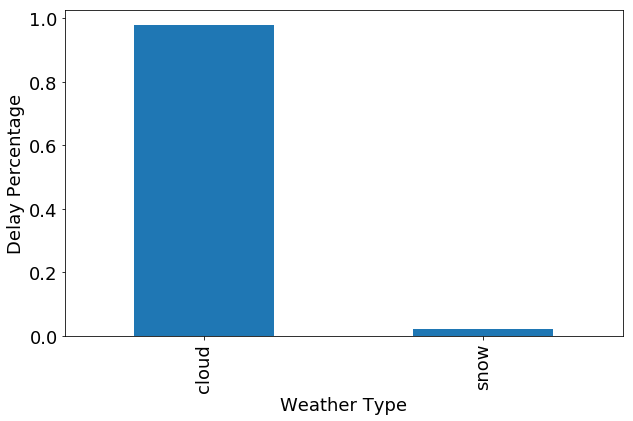

In [9]:
#weathers = ['visibility',  'wind_speed', 'snow_depth', 'cloud']
weathers = ['cloud','snow']
w_counts = list()

total_weather_type = len(df_sub)

for w in weathers:
    if w == 'snow':
        w_count = df_sub[(df_sub[w] != 0)]['weather_delay'].count()
    elif w == 'wind_speed':
        w_count = df_sub[df_sub[w] > 30]['weather_delay'].count()
    elif w == 'cloud':
        w_count = df_sub[df_sub[w] > 5 & (df_sub['visibility'] >= 5000)]['weather_delay'].count()
    elif w == 'visibility':
        w_count = df_sub[df_sub[w] < 5000 & (df_sub['cloud'] <= 5)]['weather_delay'].count()
    
    w_count = w_count/total_weather_type
    w_counts.append(w_count)

print(sum(w_counts))
weather_types = pd.DataFrame(data=w_counts, index=weathers, columns=['weather_delay'])
print(weather_types)

# Pie chart
labels = weathers
sizes = weather_types['weather_delay']

#colors = ['Red','Green','Yellow','Blue']
colors = ['#66b3ff','#99ff99']


plt.rcParams['font.size'] = 18
plt.figure(figsize=(9,5))
title = plt.title('Flight Delay Percentage According to Weather Condition', fontsize=15)
title.set_ha("left")
#plt.gca().axis("equal")
pie = plt.pie(sizes, autopct='%1.1f%%', startangle=0, labeldistance=20)
plt.legend(pie[0],labels,   fontsize=15, bbox_transform=plt.gcf().transFigure, loc=[0.2,-0.10])
plt.tight_layout()
plt.show()

weather_types['weather_delay'].plot(kind='bar', figsize=(10,6));
plt.xlabel('Weather Type')
plt.ylabel('Delay Percentage')
plt.title("");



In [10]:
len(df_sub) # weather delay flights

1364

In [11]:
len(df_sub['airport_name'].value_counts())

3

In [12]:
airport_id = list(df_sub['airport_id'].value_counts().index)
airport_id

['JFK', 'EWR', 'LGA']

In [13]:
(df_sub['cloud'] != 0 & (df_sub['airport_id'] == 'DL')).sum()

1333

In [14]:
airline_weather_list = list()
total_weather = 0
for airport in airport_id:
    
    w_airline_count = dict()
    for w in weathers:
        if w == 'snow':
            w_airline_count[w] = ((df_sub[w] != 0) & (df_sub['airport_id'] == airport)).sum()
        elif w == 'cloud':
            w_airline_count[w] = ((df_sub[w] > 5) & (df_sub['airport_id'] == airport)).sum()
        
    total_weather = (sum(w_airline_count.values()))
    w_airline_count['total'] = total_weather
    airline_weather_list.append(w_airline_count)

airline_weather_df = pd.DataFrame(data=airline_weather_list, index=[airport_id])
airline_weather_df = airline_weather_df.head(12)
print(airline_weather_df)

for col in weathers:
    
    airline_weather_df[col] = airline_weather_df[col]/airline_weather_df['total']
    
airline_weather_df   
    

     cloud  snow  total
JFK    521    14    535
EWR    462    10    472
LGA    350     8    358


,cloud,snow,total
JFK,0.973832,0.026168,535
EWR,0.978814,0.021186,472
LGA,0.977654,0.022346,358


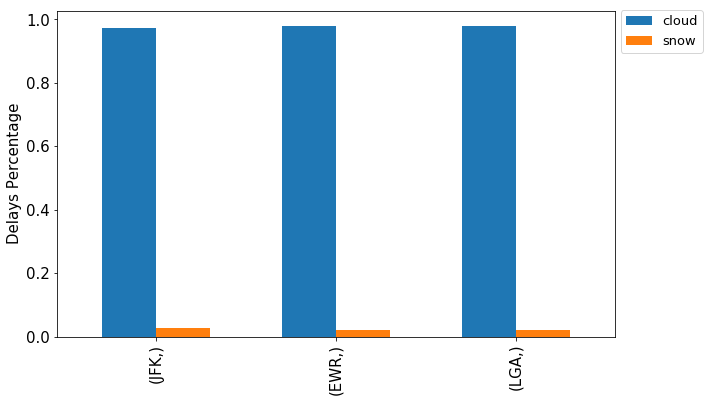

In [15]:
airline_weather_df[['cloud','snow']].plot(kind="bar", figsize=(10,6), width=0.6, fontsize=15)
#plt.xlabel('Airports', fontsize=15)
plt.ylabel('Delays Percentage', fontsize=15)
#plt.title("Flight Delays Frequency with Weather Type According to Airport");
plt.legend(fontsize=13, loc=[1.01,0.87])


In [16]:
month_cloud = df_sub[df_sub['cloud'] > 5 & (df_sub['visibility'] >= 5000)].groupby('month')['weather_delay'].count()
month_snow = df_sub[df_sub['snow'] != 0].groupby('month')['weather_delay'].count()
total_weather = sum(month_cloud)+sum(month_snow)
month_cloud= month_cloud / total_weather


month_snow= month_snow / total_weather

month_df = pd.concat([month_cloud, month_snow], axis=1)
month_df.columns = ['Cloud', 'Snow']
month_df.replace(np.nan, 0, inplace=True)
month_df

,Cloud,Snow
month,,
1,0.180220,0.006593
2,0.121612,0.009524
3,0.091575,0.001465
4,0.067399,0.000000
5,0.026374,0.000000
6,0.061538,0.000000
7,0.082051,0.000000
8,0.120147,0.000000
9,0.023443,0.000000


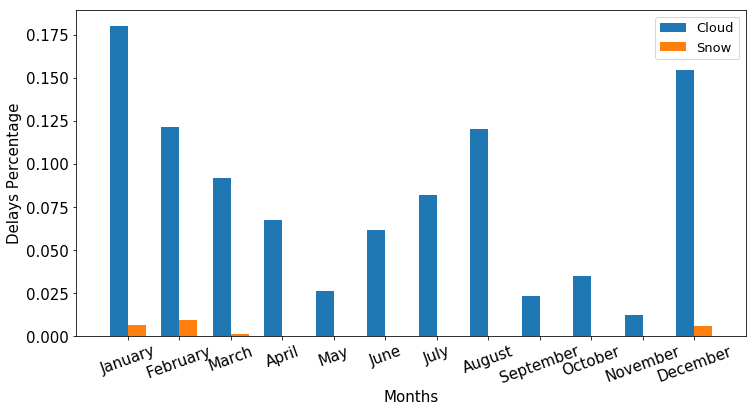

In [17]:

# ax = month_cloud.plot( x='month', kind='bar',figsize = (12,6), fontsize=15, alpha=0.6, label="Cloud status",  xlim=(0, 13))
month_df.plot( kind='bar',figsize = (12,6), width=0.7, fontsize=15, label="Snow depth", xlim=(0, 13))
plt.xlabel('Months', fontsize=15)
plt.ylabel('Delays Percentage', fontsize=15)
plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=20, fontsize=15);
plt.xlim(-1,12)
plt.legend(fontsize=13)



In [19]:
df_sub

,index,year,month,day,datetime,airline_id,airport_name,airport_id,weather_delay,visibility,wind_direction,wind_speed,snow,cloud
0,34676,2017,1,22,2017-01-22 00:51:00,B6,"JFK INTERNATIONAL AIRPORT, NY US",JFK,51.0,805,240,4.6,0.0,9.0
1,34677,2017,1,22,2017-01-22 06:51:00,B6,"JFK INTERNATIONAL AIRPORT, NY US",JFK,51.0,201,210,2.1,0.0,9.0
2,34678,2017,1,22,2017-01-22 12:51:00,B6,"JFK INTERNATIONAL AIRPORT, NY US",JFK,51.0,3219,90,1.5,0.0,9.0
3,34679,2017,1,22,2017-01-22 18:51:00,B6,"JFK INTERNATIONAL AIRPORT, NY US",JFK,51.0,11265,10,4.6,0.0,9.0
4,36348,2017,1,3,2017-01-03 00:51:00,AA,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",EWR,1.0,4828,20,5.1,0.0,9.0
5,36349,2017,1,3,2017-01-03 06:51:00,AA,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",EWR,1.0,6437,40,5.7,0.0,9.0
6,36350,2017,1,3,2017-01-03 12:51:00,AA,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",EWR,1.0,8047,40,7.2,0.0,9.0
7,36351,2017,1,3,2017-01-03 18:51:00,AA,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",EWR,1.0,11265,30,5.7,0.0,9.0
8,37132,2017,1,8,2017-01-08 00:51:00,UA,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",EWR,35.0,3219,330,6.7,0.0,9.0
9,37133,2017,1,8,2017-01-08 06:51:00,UA,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",EWR,35.0,16093,300,6.2,0.0,9.0


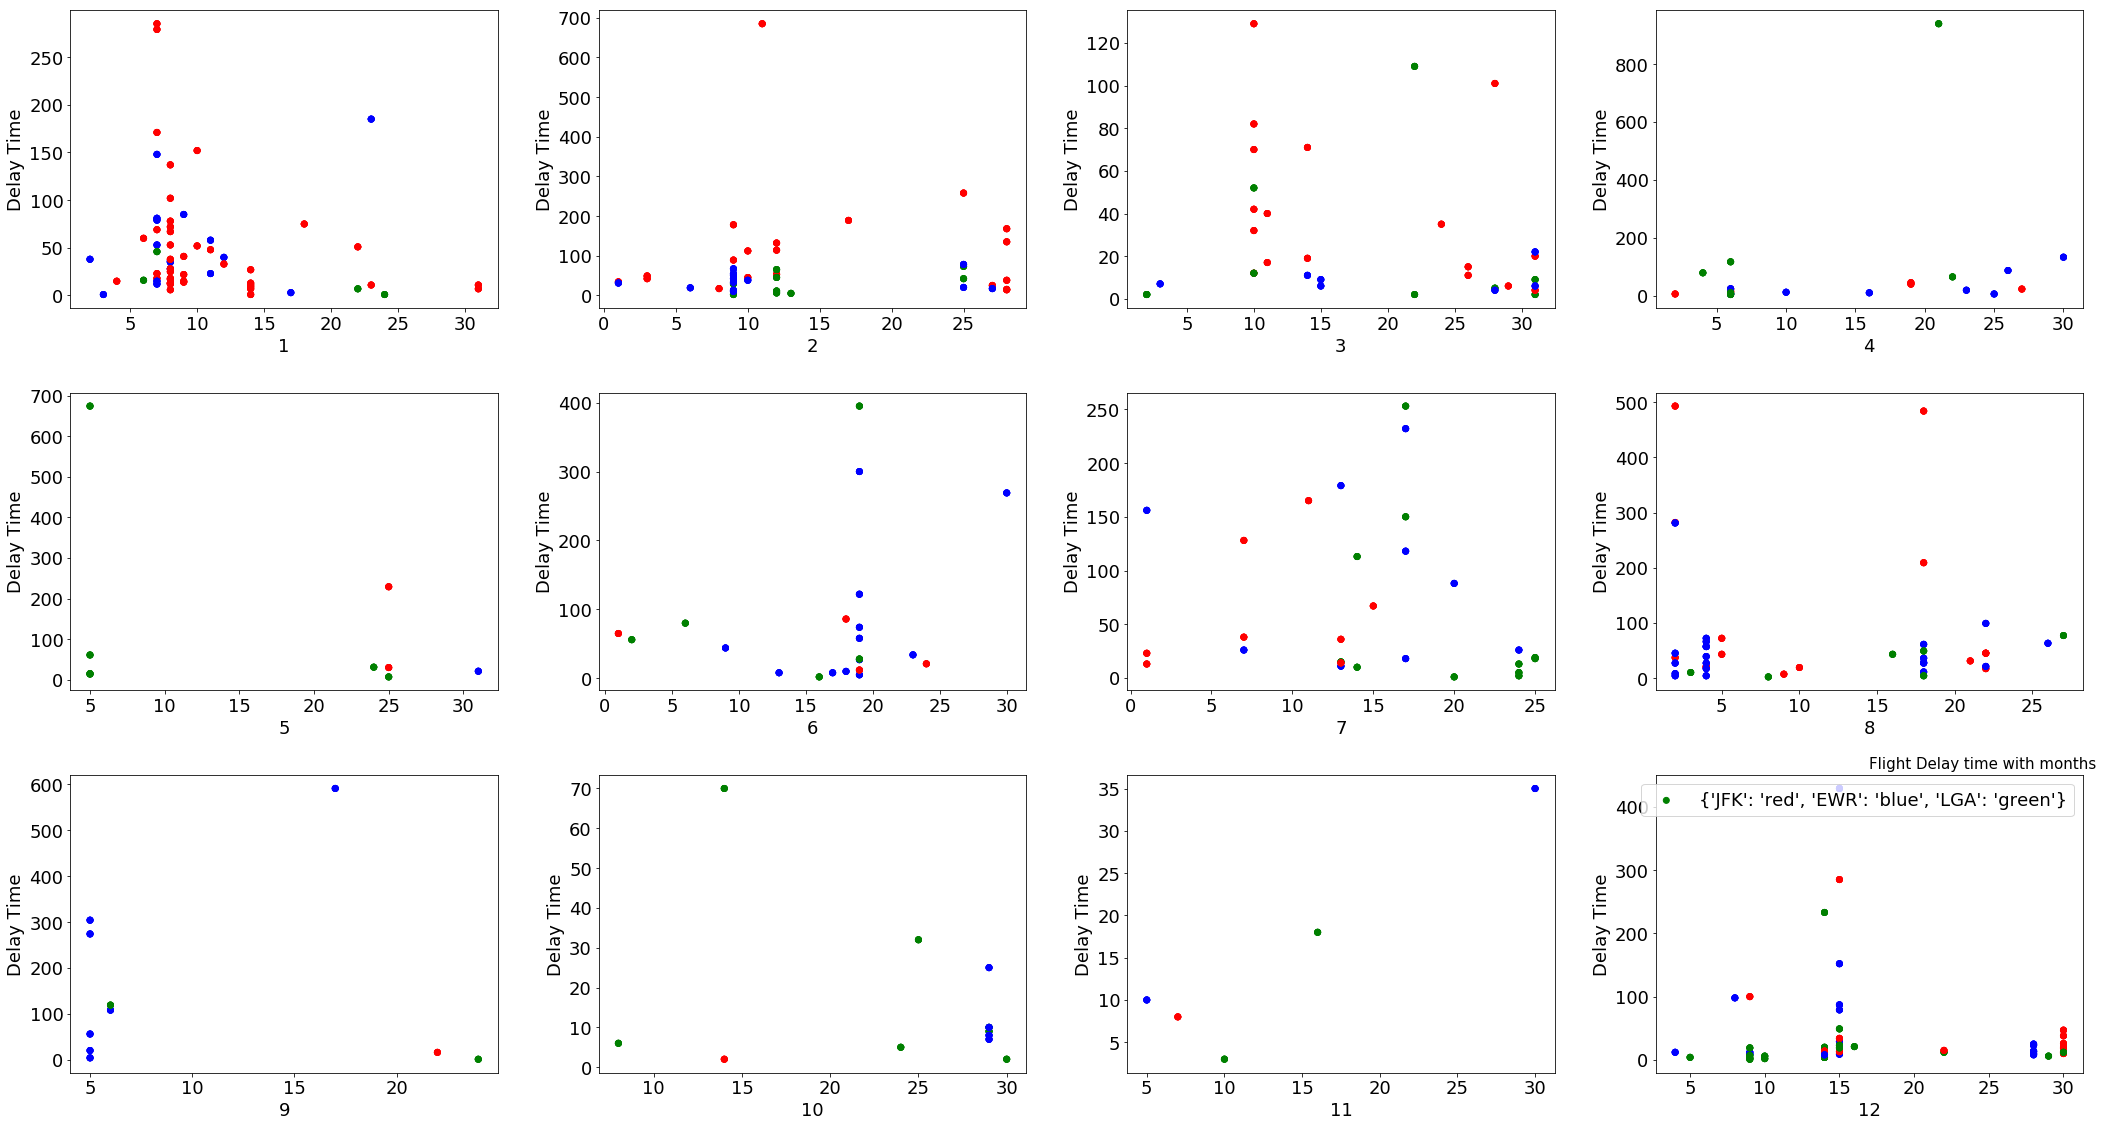

In [32]:

fig, axes = plt.subplots(ncols=4,nrows=3, figsize = (30, 16))
colors = {'JFK':'red', 'EWR':'blue', 'LGA':'green'}
title = plt.title('Flight Delay time with months', fontsize=15)
title.set_ha("left")
for ax, sub in zip(axes.flat, df_sub.groupby('month')):
    x = sub[1]['day']
    y = sub[1]['weather_delay']
    ax.scatter(x, y, c=sub[1]['airport_id'].apply(lambda x: colors[x]), label=colors)
    ax.set(xlabel=sub[0], ylabel='Delay Time')

plt.legend()
plt.tight_layout()


In [21]:
df_sub['day_name'] = df_sub['datetime'].apply(lambda x : calendar.day_name[x.weekday()])

In [22]:
def get_season(month):
    if (month == 12) or (month == 1) or (month == 2):
        return 'winter'
    elif (month == 3) or (month == 4) or (month == 5):
        return 'spring'
    elif (month == 6) or (month == 7) or (month == 8):
        return 'summer'
    else:
        return 'fall'
        

In [23]:
df_sub['season'] = df_sub['month'].apply(get_season)
#df_sub['season'] = df_sub['month'].apply(lambda x: (x%12 + 3)//3 )

In [24]:
df_sub.head()

,index,year,month,day,datetime,airline_id,airport_name,airport_id,weather_delay,visibility,wind_direction,wind_speed,snow,cloud,day_name,season
0,34676,2017,1,22,2017-01-22 00:51:00,B6,"JFK INTERNATIONAL AIRPORT, NY US",JFK,51.0,805,240,4.6,0.0,9.0,Sunday,winter
1,34677,2017,1,22,2017-01-22 06:51:00,B6,"JFK INTERNATIONAL AIRPORT, NY US",JFK,51.0,201,210,2.1,0.0,9.0,Sunday,winter
2,34678,2017,1,22,2017-01-22 12:51:00,B6,"JFK INTERNATIONAL AIRPORT, NY US",JFK,51.0,3219,90,1.5,0.0,9.0,Sunday,winter
3,34679,2017,1,22,2017-01-22 18:51:00,B6,"JFK INTERNATIONAL AIRPORT, NY US",JFK,51.0,11265,10,4.6,0.0,9.0,Sunday,winter
4,36348,2017,1,3,2017-01-03 00:51:00,AA,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",EWR,1.0,4828,20,5.1,0.0,9.0,Tuesday,winter


# Season with week days

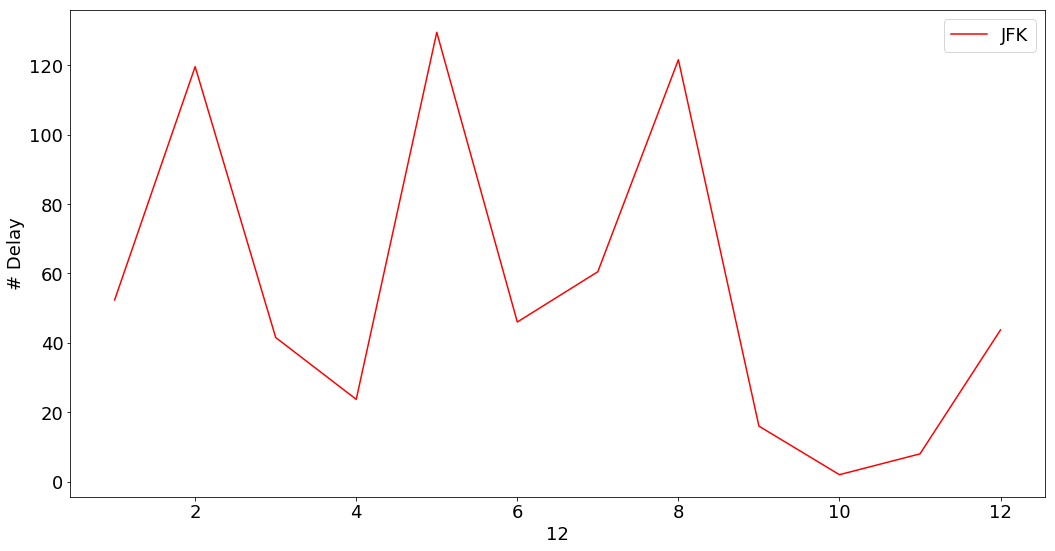

In [25]:
season_jfk = pd.DataFrame(df_sub[df_sub['airport_id'] == 'JFK'].groupby([ 'month','season'])['weather_delay'].mean()).reset_index()
season_EWR = pd.DataFrame(df_sub[df_sub['airport_id'] == 'EWR'].groupby(['season', 'month'])['weather_delay'].mean()).reset_index()
season_LGA = pd.DataFrame(df_sub[df_sub['airport_id'] == 'LGA'].groupby(['season', 'month'])['weather_delay'].mean()).reset_index()


fig, axes = plt.subplots( figsize=(15, 8))
#colors = {'JFK':'red', 'EWR':'blue', 'LGA':'green'}
bar_width = 0.4
n = 6
index = np.arange(n)


x = season_jfk['month']
y = season_jfk['weather_delay']
axes.plot(x, y, color='r',  label='JFK')
axes.set(xlabel=sub[0], ylabel='# Delay')
axes.legend()

plt.tight_layout()


In [26]:
df_sub

,index,year,month,day,datetime,airline_id,airport_name,airport_id,weather_delay,visibility,wind_direction,wind_speed,snow,cloud,day_name,season
0,34676,2017,1,22,2017-01-22 00:51:00,B6,"JFK INTERNATIONAL AIRPORT, NY US",JFK,51.0,805,240,4.6,0.0,9.0,Sunday,winter
1,34677,2017,1,22,2017-01-22 06:51:00,B6,"JFK INTERNATIONAL AIRPORT, NY US",JFK,51.0,201,210,2.1,0.0,9.0,Sunday,winter
2,34678,2017,1,22,2017-01-22 12:51:00,B6,"JFK INTERNATIONAL AIRPORT, NY US",JFK,51.0,3219,90,1.5,0.0,9.0,Sunday,winter
3,34679,2017,1,22,2017-01-22 18:51:00,B6,"JFK INTERNATIONAL AIRPORT, NY US",JFK,51.0,11265,10,4.6,0.0,9.0,Sunday,winter
4,36348,2017,1,3,2017-01-03 00:51:00,AA,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",EWR,1.0,4828,20,5.1,0.0,9.0,Tuesday,winter
5,36349,2017,1,3,2017-01-03 06:51:00,AA,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",EWR,1.0,6437,40,5.7,0.0,9.0,Tuesday,winter
6,36350,2017,1,3,2017-01-03 12:51:00,AA,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",EWR,1.0,8047,40,7.2,0.0,9.0,Tuesday,winter
7,36351,2017,1,3,2017-01-03 18:51:00,AA,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",EWR,1.0,11265,30,5.7,0.0,9.0,Tuesday,winter
8,37132,2017,1,8,2017-01-08 00:51:00,UA,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",EWR,35.0,3219,330,6.7,0.0,9.0,Sunday,winter
9,37133,2017,1,8,2017-01-08 06:51:00,UA,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",EWR,35.0,16093,300,6.2,0.0,9.0,Sunday,winter


In [27]:
total_jfk = df_sub[df_sub['airport_id'] == 'JFK']['weather_delay'].count()
total_EWR = df_sub[df_sub['airport_id'] == 'EWR']['weather_delay'].count()
total_LGA = df_sub[df_sub['airport_id'] == 'LGA']['weather_delay'].count()

jfk_df = df_sub[df_sub['airport_id'] == 'JFK'].groupby(['month','season'])['weather_delay'].count()
EWR_df = df_sub[df_sub['airport_id'] == 'EWR'].groupby(['month','season'])['weather_delay'].count()
LGA_df = df_sub[df_sub['airport_id'] == 'LGA'].groupby(['month','season'])['weather_delay'].count()

jfk_df = jfk_df/total_jfk
EWR_df = EWR_df/total_EWR
LGA_df = LGA_df/total_LGA


Text(0, 0.5, 'Delay Percentage')

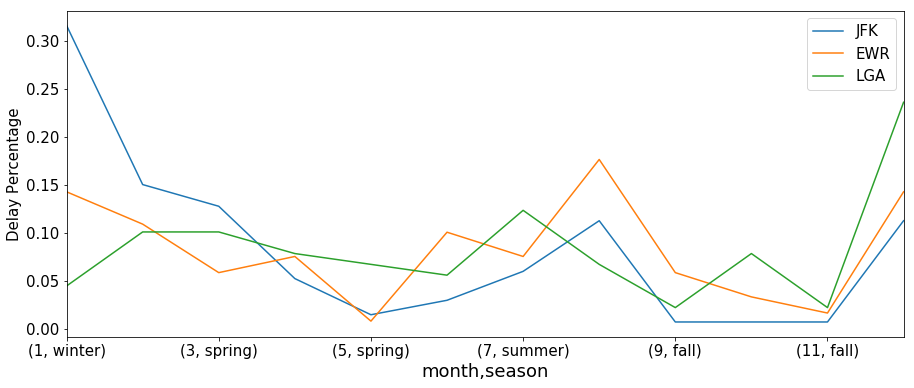

In [28]:
#df_sub.groupby(['season', 'day_name', 'airport_id'])['weather_delay'].mean().plot(kind='bar', figsize=(20,8))
#plt.style.use('ggplot')

jfk_df.plot(figsize=(15,6), label='JFK', fontsize=15)
EWR_df.plot(figsize=(15,6), label="EWR", fontsize=15)
LGA_df.plot(figsize=(15,6), label="LGA", fontsize=15)
plt.legend(fontsize=15)
plt.ylabel("Delay Percentage", fontsize=15)